# Практическая работа 3. Программные средства консолидации данных.
# Алексеев Константин БД-231м

## Цель работы
Освоить практические навыки консолидации данных из различных источников с использованием Python и библиотеки pandas.

## Задачи
1. Загрузить данные из различных источников (CSV, Excel, JSON).
2. Провести предварительную обработку и очистку данных.
3. Объединить данные из разных источников.
4. Выполнить агрегацию и трансформацию данных.
5. Сохранить консолидированные данные в новый файл.

## Необходимое программное обеспечение
- Python 3.x
- Библиотеки: pandas, numpy, matplotlib

## Исходные данные
- `sales_2022.csv`: данные о продажах за 2022 год
- `sales_2023.xlsx`: данные о продажах за 2023 год
- `products.json`: информация о продуктах


# Вариант 1. 
1. Файл CSV: данные о сотрудниках (имя, должность, зарплата). 
2. Файл Excel: данные о проектах (название проекта, бюджет, менеджер 
проекта). 
3. Файл JSON: данные о зарплатах по должностям. 

**Задача**: 
- объединить данные и рассчитать среднюю зарплату по каждому 
проекту, исходя из данных о сотрудниках и их участии в проектах.


## Ход работы

Процесс создания тестовых данных для файлов
- `employees.csv`
- `projects.xlsx`
- `project_assignments.json`


In [7]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random


Файл JSON c данные о зарплатах по должностям не нужен, так как эта информация уже есть в данных о сотрудниках. 
Вместо него создадим json, в котором будет информация о том кто задействован на проекте, тогда получится выполнить задание

In [ ]:
# 1. Файл CSV: данные о сотрудниках (имя, должность, зарплата). 

num_employees = 2000
employee_names = [f'Сотрудник_{i}' for i in range(1, num_employees + 1)]
positions = np.random.choice(['Разработчик', 'Менеджер', 'Тестировщик', 'Аналитик'], size=num_employees)
salaries = np.random.randint(50_000, 120_000, size=num_employees) 

employees_df = pd.DataFrame({
    'employee_name': employee_names,
    'position': positions,
    'salary': salaries
})
employees_df.to_csv('data/employees.csv')

# 2. Файл Excel: данные о проектах (название проекта, бюджет, менеджер проекта). 
num_projects = 100
project_names = [f'Проект_{i}' for i in range(1, num_projects + 1)]
budgets = np.random.randint(100_000, 1_000_000, size=num_projects)
project_managers = np.random.choice(employee_names, size=num_projects)

projects_df = pd.DataFrame({
    'project_name': project_names,
    'budget': budgets,
    'project_manager': project_managers
})
projects_df.to_excel('data/projects.xlsx')


# 3. Файл JSON: данные о том кто задействован на проекте
project_assignments = {
    'project_name': np.random.choice(project_names, size=num_employees).tolist(),
    'employee_name': employee_names
}

with open('data/project_assignments.json', 'w', encoding='utf-8') as f:
    json.dump(project_assignments, f, ensure_ascii=False)

Особенности сгенерированных данных:
- Файлы связаны через `project_name` и `employee_name`
- Данные имеют реалистичную структуру и вариативность.
- Пропущенных данных нет, так как это является очень важной информации и вряд ли в реальной жизни будут пропуски в информации о ЗП или о том кто учавстсовал в проекте

### Шаг 1: Подготовка рабочей среды

1. Импортируйте необходимые библиотеки:



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Шаг 2: Загрузка данных

In [41]:
employees_df = pd.read_csv('data/employees.csv', index_col=[0])
projects_df = pd.read_excel('data/projects.xlsx', index_col=[0])
project_assignments_df = pd.read_json('data/project_assignments.json')

### Шаг 3: Предварительная обработка и очистка данных
1. Проверьте наличие пропущенных значений:

In [34]:
print("\nПропущенные значения:")
print(employees_df.isnull().sum())
print(projects_df.isnull().sum())
print(project_assignments_df.isnull().sum())


Пропущенные значения:
Unnamed: 0       0
employee_name    0
position         0
salary           0
dtype: int64
Unnamed: 0         0
project_name       0
budget             0
project_manager    0
dtype: int64
project_name     0
employee_name    0
dtype: int64


### Шаг 4: Объединение данных

In [55]:
# Объединение данных о сотрудниках и их участии в проектах
merged_df = project_assignments_df.merge(employees_df, left_on='employee_name', right_on='employee_name', how='left')

# Объединение с данными о проектах
final_merged_df = merged_df.merge(projects_df, on='project_name', how='left')

In [54]:
final_merged_df

,project_name,employee_name,position,salary,budget,project_manager
0,Проект_29,Сотрудник_1,Менеджер,89076,626671,Сотрудник_1990
1,Проект_88,Сотрудник_2,Аналитик,58064,281410,Сотрудник_1232
2,Проект_92,Сотрудник_3,Аналитик,86498,585814,Сотрудник_1280
3,Проект_27,Сотрудник_4,Разработчик,119464,934999,Сотрудник_1329
4,Проект_44,Сотрудник_5,Тестировщик,93750,197088,Сотрудник_98
...,...,...,...,...,...,...
1995,Проект_30,Сотрудник_1996,Разработчик,69608,968469,Сотрудник_595
1996,Проект_15,Сотрудник_1997,Разработчик,68634,427206,Сотрудник_435
1997,Проект_29,Сотрудник_1998,Аналитик,80368,626671,Сотрудник_1990
1998,Проект_20,Сотрудник_1999,Менеджер,77170,264373,Сотрудник_1566


### Шаг 5: Агрегация и трансформация данных
Рассчитае среднюю зарплату по каждому проекту, исходя из данных о сотрудниках и их участии в проектах.

In [56]:
average_salary_per_project = final_merged_df.groupby('project_name')['salary'].mean().reset_index()

In [57]:
average_salary_per_project

,project_name,salary
0,Проект_1,91977.928571
1,Проект_10,85509.375000
2,Проект_100,87150.076923
3,Проект_11,85340.368421
4,Проект_12,90003.136364
...,...,...
95,Проект_95,85980.857143
96,Проект_96,90100.125000
97,Проект_97,83889.411765
98,Проект_98,87545.384615


### Шаг 6: Визуализация данных
1. Средняя ЗП по проекту

<Figure size 1296x864 with 0 Axes>

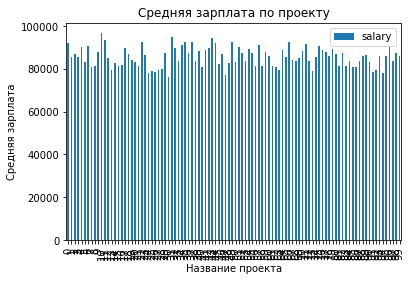

In [63]:
plt.figure(figsize=(18, 12))
average_salary_per_project.plot(kind='bar')
plt.title('Средняя зарплата по проекту')
plt.xlabel('Название проекта')
plt.ylabel('Средняя зарплата')
plt.show()

### Шаг 7: Сохранение консолидированных данных
Сохраните консолидированные данные в CSV-файл:

In [64]:
final_merged_df.to_csv('final_merged_df.csv', index=False)

**ИТОГ:**  Сгенерировали и объединили данные, рассчитали среднюю зарплату по каждому 
проекту, исходя из данных о сотрудниках и их участии в проектах